In [4]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [5]:
results = pd.read_csv('699_results_final.csv')
results

,filename,output1,output2,strat1_label1,strat1_label2,strat2_label1,strat2_label2,strat3_label1,strat3_label2,strat4_label1,strat4_label2,human_label1,human_label2,human_label_all
0,image_07919,"{'black': 0.16012293853073464, 'blue': 0.01209...","{'fg': {'black': 0.0, 'blue': 0.02442550546122...",green,black,green,pink,green,black,green,black,red,yellow,"{'red', 'green', 'pink', 'orange', 'yellow'}"
1,image_02889,"{'black': 0.058264264264264266, 'blue': 0.0, '...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",green,pink,pink,green,pink,green,green,pink,pink,green,"{'pink', 'green'}"
2,image_02606,"{'black': 0.015041800643086817, 'blue': 0.0, '...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",green,brown,green,yellow,green,red,green,red,red,yellow,"{'pink', 'yellow', 'red', 'green'}"
3,image_02582,"{'black': 0.006131934032983509, 'blue': 0.0012...","{'fg': {'black': 0.0, 'blue': 0.00160446996104...",purple,green,purple,green,purple,green,green,purple,purple,yellow,"{'yellow', 'purple', 'green'}"
4,image_02524,"{'black': 0.08323728813559322, 'blue': 0.13017...","{'fg': {'black': 0.0, 'blue': 0.25688320526271...",green,white,white,blue,white,green,green,black,white,purple,"{'blue', 'green', 'purple', 'white'}"
5,image_02468,"{'black': 0.003394302848575712, 'blue': 0.1297...","{'fg': {'black': 0.0, 'blue': 0.65981584246691...",orange,brown,blue,orange,blue,orange,orange,brown,blue,brown,"{'blue', 'brown', 'orange'}"
6,image_02442,"{'black': 0.02641781548250265, 'blue': 0.00073...","{'fg': {'black': 0.0, 'blue': 0.00159756561430...",gray,purple,purple,gray,purple,gray,gray,brown,purple,gray,"{'brown', 'green', 'gray', 'purple', 'pink'}"
7,image_02190,"{'black': 0.0017426470588235293, 'blue': 0.0, ...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",orange,yellow,orange,yellow,orange,red,orange,red,orange,green,"{'brown', 'orange', 'yellow', 'green'}"
8,image_01807,"{'black': 0.007767379679144385, 'blue': 0.0001...","{'fg': {'black': 0.0, 'blue': 0.00053419709328...",red,white,white,green,white,red,red,green,red,green,"{'white', 'red', 'green'}"
9,image_01726,"{'black': 0.04331466666666667, 'blue': 0.0, 'b...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",yellow,green,yellow,gray,yellow,green,green,black,yellow,green,"{'green', 'black', 'blue', 'orange', 'yellow'}"


In [7]:
def read_set():
    human_labels = {}
    for i in range(20):
        img = results['filename'][i]
        labels = results['human_label_all'][i][1:-1].replace("'", "").split(', ')
        human_labels[img] = labels
    
    return human_labels

human_labels = read_set()

In [9]:
# give 2 pts for the most popular answer, 1 pt for a human answer, 0 pts for neither
# max accuracy score is 4, but 2 still means a human-like score

def scoring_strats(column1, column2):
    scores = []
    for i in range(20):
        tally = 0
        img = results['filename'][i]
        label1 = results[column1][i]
        label2 = results[column2][i]
        human1 = results['human_label1'][i]
        human2 = results['human_label2'][i]
        
        if (label1 == human1) or (label1 == human2):
            tally += 2
        else:
            if label1 in human_labels[img]:
                tally += 1
            
        if (label2 == human1) or (label2 == human2):
            tally += 2
        
        else:
            if label2 in human_labels[img]:
                tally += 1
        
        scores.append(tally)
        
    return scores
        

In [10]:
results['strat1_score'] = scoring_strats('strat1_label1', 'strat1_label2')
results['strat2_score'] = scoring_strats('strat2_label1', 'strat2_label2')
results['strat3_score'] = scoring_strats('strat3_label1', 'strat3_label2')
results['strat4_score'] = scoring_strats('strat4_label1', 'strat4_label2')
results

,filename,output1,output2,strat1_label1,strat1_label2,strat2_label1,strat2_label2,strat3_label1,strat3_label2,strat4_label1,strat4_label2,human_label1,human_label2,human_label_all,strat1_score,strat2_score,strat3_score,strat4_score
0,image_07919,"{'black': 0.16012293853073464, 'blue': 0.01209...","{'fg': {'black': 0.0, 'blue': 0.02442550546122...",green,black,green,pink,green,black,green,black,red,yellow,"{'red', 'green', 'pink', 'orange', 'yellow'}",1,2,1,1
1,image_02889,"{'black': 0.058264264264264266, 'blue': 0.0, '...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",green,pink,pink,green,pink,green,green,pink,pink,green,"{'pink', 'green'}",4,4,4,4
2,image_02606,"{'black': 0.015041800643086817, 'blue': 0.0, '...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",green,brown,green,yellow,green,red,green,red,red,yellow,"{'pink', 'yellow', 'red', 'green'}",1,3,3,3
3,image_02582,"{'black': 0.006131934032983509, 'blue': 0.0012...","{'fg': {'black': 0.0, 'blue': 0.00160446996104...",purple,green,purple,green,purple,green,green,purple,purple,yellow,"{'yellow', 'purple', 'green'}",3,3,3,3
4,image_02524,"{'black': 0.08323728813559322, 'blue': 0.13017...","{'fg': {'black': 0.0, 'blue': 0.25688320526271...",green,white,white,blue,white,green,green,black,white,purple,"{'blue', 'green', 'purple', 'white'}",3,3,3,1
5,image_02468,"{'black': 0.003394302848575712, 'blue': 0.1297...","{'fg': {'black': 0.0, 'blue': 0.65981584246691...",orange,brown,blue,orange,blue,orange,orange,brown,blue,brown,"{'blue', 'brown', 'orange'}",3,3,3,3
6,image_02442,"{'black': 0.02641781548250265, 'blue': 0.00073...","{'fg': {'black': 0.0, 'blue': 0.00159756561430...",gray,purple,purple,gray,purple,gray,gray,brown,purple,gray,"{'brown', 'green', 'gray', 'purple', 'pink'}",4,4,4,3
7,image_02190,"{'black': 0.0017426470588235293, 'blue': 0.0, ...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",orange,yellow,orange,yellow,orange,red,orange,red,orange,green,"{'brown', 'orange', 'yellow', 'green'}",3,3,2,2
8,image_01807,"{'black': 0.007767379679144385, 'blue': 0.0001...","{'fg': {'black': 0.0, 'blue': 0.00053419709328...",red,white,white,green,white,red,red,green,red,green,"{'white', 'red', 'green'}",3,3,3,4
9,image_01726,"{'black': 0.04331466666666667, 'blue': 0.0, 'b...","{'fg': {'black': 0.0, 'blue': 0.0, 'brown': 0....",yellow,green,yellow,gray,yellow,green,green,black,yellow,green,"{'green', 'black', 'blue', 'orange', 'yellow'}",4,2,4,3


In [30]:
print('Strategy 1 average score:', np.mean(results['strat1_score']))
print('Strategy 2 average score:', np.mean(results['strat2_score']))
print('Strategy 3 average score:', np.mean(results['strat3_score']))
print('Strategy 4 average score:', np.mean(results['strat4_score']))

print('Strategy 1 median score:', np.median(results['strat1_score']))
print('Strategy 2 median score:', np.median(results['strat2_score']))
print('Strategy 3 median score:', np.median(results['strat3_score']))
print('Strategy 4 median score:', np.median(results['strat4_score']))

print('Strategy 1 min score:', np.min(results['strat1_score']))
print('Strategy 2 min score:', np.min(results['strat2_score']))
print('Strategy 3 min score:', np.min(results['strat3_score']))
print('Strategy 4 min score:', np.min(results['strat4_score']))

print('Strategy 1 max score:', np.max(results['strat1_score']))
print('Strategy 2 max score:', np.max(results['strat2_score']))
print('Strategy 3 max score:', np.max(results['strat3_score']))
print('Strategy 4 max score:', np.max(results['strat4_score']))

Strategy 1 average score: 2.95
Strategy 2 average score: 2.8
Strategy 3 average score: 2.95
Strategy 4 average score: 2.5
Strategy 1 median score: 3.0
Strategy 2 median score: 3.0
Strategy 3 median score: 3.0
Strategy 4 median score: 3.0
Strategy 1 min score: 0
Strategy 2 min score: 0
Strategy 3 min score: 0
Strategy 4 min score: 0
Strategy 1 max score: 4
Strategy 2 max score: 4
Strategy 3 max score: 4
Strategy 4 max score: 4


In [17]:
scores = results.drop(['filename', 'output1', 'output2', 'strat1_label1', 'strat1_label2',
       'strat2_label1', 'strat2_label2', 'strat3_label1', 'strat3_label2',
       'strat4_label1', 'strat4_label2', 'human_label1', 'human_label2',
       'human_label_all'], axis=1)

,strat1_score,strat2_score,strat3_score,strat4_score
0,1,2,1,1
1,4,4,4,4
2,1,3,3,3
3,3,3,3,3
4,3,3,3,1
5,3,3,3,3
6,4,4,4,3
7,3,3,2,2
8,3,3,3,4
9,4,2,4,3


Text(0.5, 0, 'Strategies')

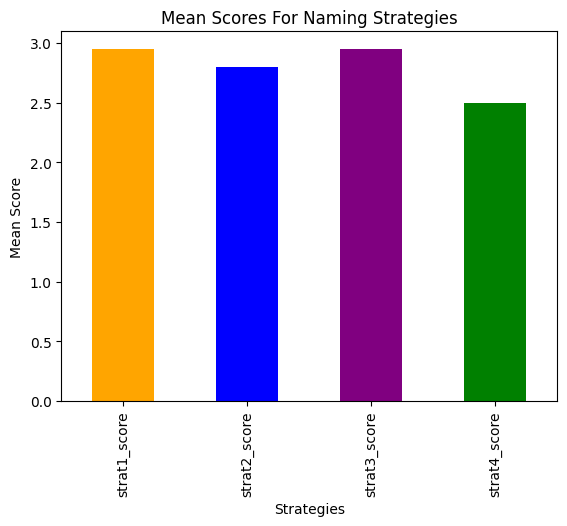

In [21]:
scores.mean().plot.bar(color=['orange','blue','purple', 'green'])
plt.title('Mean Scores For Naming Strategies')
plt.ylabel('Mean Score')
plt.xlabel('Strategies')

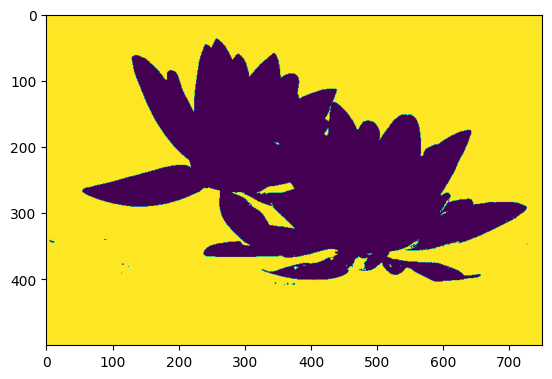

In [34]:
pix = cv.imread('flowers/image_00333.jpg')

gray = cv.cvtColor(pix,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)

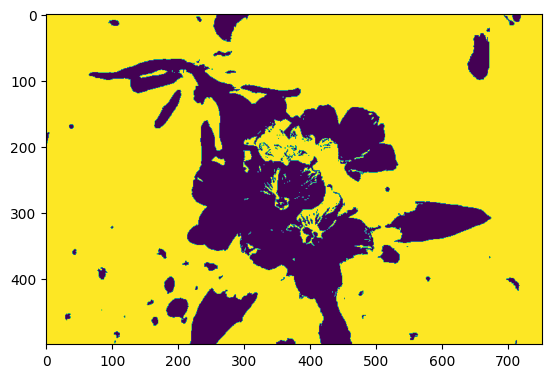

In [31]:
pix = cv.imread('flowers/image_00968.jpg')

gray = cv.cvtColor(pix,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)

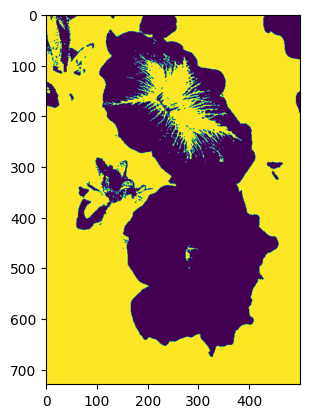

In [33]:
pix = cv.imread('flowers/image_01354.jpg')

gray = cv.cvtColor(pix,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)